# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform feature selection. 

👇 Run the cell below to load your preprocessed dataset.

In [0]:
import pandas as pd

data = pd.read_csv("data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


# Collinearity investigation

👇 Plot a heatmap of the Pearson Correlation between the dataset columns.

<AxesSubplot:>

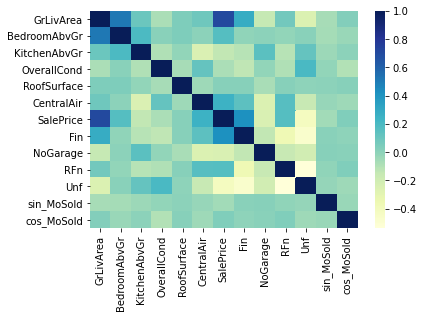

In [0]:
import seaborn as sns

corr = data.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")


👇 Visualize the correlation between column pairs in a dataframe.

In [0]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head()

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.707685
78,SalePrice,GrLivArea,0.707685
1,GrLivArea,BedroomAbvGr,0.519712
13,BedroomAbvGr,GrLivArea,0.519712
85,SalePrice,Fin,0.419678


❓ How many pairs of features exceed a correlation of 0.9 or -0.9? Save your answer as an integer under variable name `correlated_features`

In [0]:
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])

correlated_features

0

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/benjaminauzanneau/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/benjaminauzanneau/code/lewagon/data-solutions/05-ML/02-Prepare-the-dataset/02-Feature-Selection
collecting ... collected 1 item

tests/test_correlation.py::TestCorrelation::test_correlated_features PASSED [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master


# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [0]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

👇 Cross validate a linear regression model. Save the score under variable name `base_model_score`.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

0.6458928075229267

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/benjaminauzanneau/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/benjaminauzanneau/code/lewagon/data-solutions/05-ML/02-Prepare-the-dataset/02-Feature-Selection
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


# Feature Permutation

👇 Perform feature permutation, and rank features by order of importance.

In [0]:
import numpy as np
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
0,GrLivArea,1.011799
1,BedroomAbvGr,0.065779
6,Fin,0.052495
9,Unf,0.020822
2,KitchenAbvGr,0.02
5,CentralAir,0.015497
7,NoGarage,0.012148
8,RFn,0.011646
10,sin_MoSold,0.000871
3,OverallCond,0.000259


❓ Which feature is the most important? Save your answer as a `string` under variable name `best_feature`.

In [0]:
best_feature = importance_df.feature[0]
best_feature

'GrLivArea'

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/benjaminauzanneau/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/benjaminauzanneau/code/lewagon/data-solutions/05-ML/02-Prepare-the-dataset/02-Feature-Selection
collecting ... collected 1 item

tests/test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master


# Reduced complexity model

👇 Drop the the weak features and cross-validate a new model. You should aim to maintain a score close to the previous one. Save the score under variable name `simplified_model_score`.

In [0]:
X = X.drop(columns=['RoofSurface','OverallCond','sin_MoSold','cos_MoSold','RFn','NoGarage']) # Drops weak features

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean()

simplified_model_score

0.6376353182930796

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/benjaminauzanneau/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/benjaminauzanneau/code/lewagon/data-solutions/05-ML/02-Prepare-the-dataset/02-Feature-Selection
collecting ... collected 1 item

tests/test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master


# 🏁